In [11]:
import gymnasium as gym
from gymnasium.spaces import Discrete, Box
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
N_ARMS = 10
true_rewards = np.random.normal(loc=0, scale=1, size=N_ARMS)

In [4]:
true_rewards

array([-3.05786747,  0.86113424,  0.48978443, -1.22647808, -0.51460307,
        0.36791388,  1.77317601, -0.15258592, -3.37065474,  2.55006244])

In [8]:
data = [np.random.normal(loc=reward, scale=1, size=500) for reward in true_rewards]

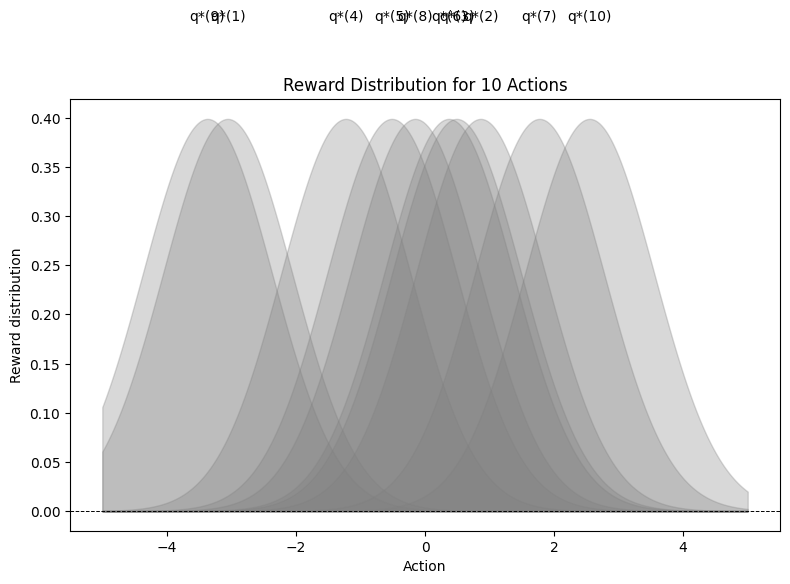

In [12]:
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(8, 6))
for i in range(1, N_ARMS + 1):
    mean = true_rewards[i - 1]  # Mean of the normal distribution (can be adjusted)
    std_dev = 1  # Standard deviation of the normal distribution (can be adjusted)

    # Calculate the normal distribution
    y = norm.pdf(x, mean, std_dev)

    # Plot the distribution as a filled area
    plt.fill_between(x, y, alpha=0.3, color="gray")

    # Add labels for the q* values at the center of the distributions
    plt.text(mean, max(y) + 0.1, f"q*({i})", horizontalalignment="center")

# Add labels and title
plt.xlabel("Action")
plt.ylabel("Reward distribution")
plt.title("Reward Distribution for 10 Actions")
plt.axhline(0, color="black", linewidth=0.7, linestyle="--")
plt.tight_layout()

# Show plot
plt.show()

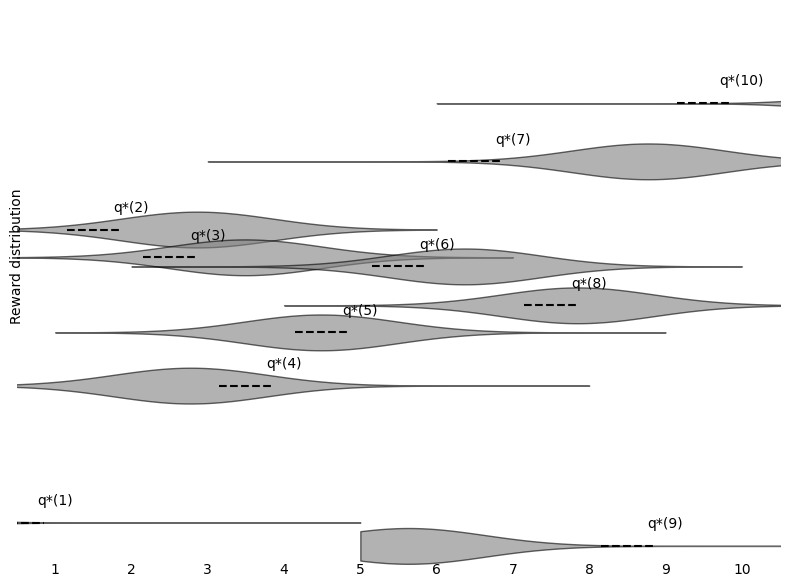

In [13]:
std = 1  # Standard deviation (same for all actions in this example)

# Create the Violin Plot
fig, ax = plt.subplots(figsize=(8, 6))

# X-axis values for plotting the normal distribution curves
x = np.linspace(-4, 4, 200)  # Adjust range as needed

for i in range(N_ARMS):
    # Calculate the normal distribution probability density function (PDF)
    y = norm.pdf(x, loc=true_rewards[i], scale=std)

    # Scale and shift the PDF to fit within the violin plot's expected area
    y_scaled = y * 0.6  # Adjust scaling as needed
    y_shifted = y_scaled + true_rewards[i]  # Shift vertically to the mean

    # Plot the filled areas (violins) using the PDF
    ax.fill_between(
        x + i + 1, true_rewards[i] - y_scaled, true_rewards[i] + y_scaled, color="gray", alpha=0.6, edgecolor="black"
    )

    # Add Horizontal Lines (using the actual means)
    ax.axhline(
        true_rewards[i], xmin=i / N_ARMS - 0.035, xmax=i / N_ARMS + 0.035, color="black", linestyle="--", zorder=1
    )

    # Add Text Labels
    ax.text(i + 1, -3.6, str(i + 1), ha="center", va="top")  # Action numbers
    ax.text(i + 1, true_rewards[i] + 0.2, f"q*({i + 1})", ha="center", va="bottom")  # q*(a) labels


ax.text(0.5, 0.5, "Reward distribution", ha="center", va="center", rotation="vertical")

# Set Axis Limits and Remove Spines
ax.set_xlim(0.5, N_ARMS + 0.5)
ax.set_ylim(-3.8, 3.8)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Show the Plot
plt.tight_layout()
plt.show()

In [6]:
data

[array([-4.5250208 , -2.46242852, -1.86455298, -3.15097488, -4.83555159,
        -2.52855394, -3.97894495, -1.78847316, -3.50451934, -2.05294312,
        -4.57931063, -2.41976723, -3.0049765 , -1.74362862, -4.79506853,
        -2.73801854, -3.43831836, -1.55131181, -3.87945953, -3.40821854,
        -3.41236987, -1.5901929 , -3.08077939, -2.87157722, -1.89536523,
        -3.21791968, -2.12318633, -3.51829058, -2.71999218, -2.61553175,
        -2.05859202, -3.01775877, -2.45378903, -3.52913217, -2.47198365,
        -4.86871925, -3.22827955, -4.86233709, -3.95948923, -0.93508595,
        -3.58573743, -1.74071843, -1.6375192 , -2.62781065, -3.37072892,
        -2.68372712, -4.58006535, -4.10640625, -2.511639  , -3.10640279]),
 array([-0.34415792,  0.4362972 ,  0.68586351,  0.14153975,  0.7330714 ,
         1.99386848,  1.39988043,  0.60716542,  0.39083085,  1.87444952,
         0.31439618, -1.31893573,  0.85997292,  0.00388449, -0.5343486 ,
         0.53178472,  0.33548456,  0.47532819,  1

In [ ]:
class TenArmedBanditEnv(gym.Env):
    def __init__(self, render_mode=None):
        super().__init__()

        self.n_arms = 10  # 10-armed bandit
        self.action_space = Discrete(self.n_arms)
        self.observation_space = Box(low=0, high=1, shape=(1,), dtype=np.float32)  # Simplest observation: a single 0

        # True reward probabilities for each arm (unknown to the agent)
        self.true_rewards = np.random.normal(loc=0, scale=1, size=self.n_arms)  # Gaussian rewards

    def step(self, action):
        # Check if the action is valid
        if not self.action_space.contains(action):
            raise ValueError("Invalid action.")

        # Get the reward for the chosen action (using the hidden true reward distribution)
        reward = np.random.normal(loc=self.true_rewards[action], scale=1)  # Add some noise to the reward

        # The observation is always the same (important for bandit problems)
        observation = np.array([0], dtype=np.float32)  # A single 0, indicating no real state

        terminated = False  # Bandit problems are usually non-episodic
        truncated = False

        info = {"true_reward": self.true_rewards[action]}  # Information for debugging/analysis (not used by agent)

        return observation, reward, terminated, truncated, info

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)

        observation = np.array([0], dtype=np.float32)

        info = {}

        return observation, info

In [3]:
# Example usage:
env = TenArmedBanditEnv(render_mode="human")  # or render_mode="rgb_array"
observation, info = env.reset()

for _ in range(100):  # Play 100 steps
    action = env.action_space.sample()  # Replace with your agent's policy
    observation, reward, terminated, truncated, info = env.step(action)
    print(f"Action: {action}, Reward: {reward}, True Reward: {info['true_reward']}")  # Print reward and info
    if terminated or truncated:
        observation, info = env.reset()

env.close()

Action: 6, Reward: -0.3776325253568491, True Reward: -0.27596509618226667
Action: 5, Reward: -0.5154055390197261, True Reward: -0.48584968471991546
Action: 7, Reward: -2.6434454631066098, True Reward: -2.5845702062011275
Action: 0, Reward: -1.005422933505338, True Reward: -0.9437517018660504
Action: 3, Reward: -1.6096825799864263, True Reward: -1.603448464225791
Action: 5, Reward: -0.7163024030950288, True Reward: -0.48584968471991546
Action: 2, Reward: 0.19001432813028168, True Reward: 0.2608367578065151
Action: 7, Reward: -2.6151122639573057, True Reward: -2.5845702062011275
Action: 1, Reward: 0.7973655998548574, True Reward: 0.8624245207997061
Action: 9, Reward: 0.5169302547250532, True Reward: 0.3468573320245611
Action: 9, Reward: 0.3938755554009229, True Reward: 0.3468573320245611
Action: 2, Reward: 0.004549919582902406, True Reward: 0.2608367578065151
Action: 4, Reward: 1.5508833934621982, True Reward: 1.5719371877691592
Action: 0, Reward: -0.924142459156567, True Reward: -0.9437

In [ ]:
env = TenArmedBanditEnv()  # No rendering
observation, info = env.reset()
for _ in range(100):  # Play 100 steps
    action = env.action_space.sample()  # Replace with your agent's policy
    observation, reward, terminated, truncated, info = env.step(action)

env.close()

In [1]:
import matplotlib